In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_new = pd.read_csv(r"df_with_formtext.csv")
df_new.head()

,Unnamed: 0,companyName,CIK,filedDate,url,realfiledDate,form_text
0,0,"Avangard Capital Group, Inc",1561092,2014-01-03,/Archives/edgar/data/1561092/00014931521400000...,2014-01-03,\n\n \n\n \n \nUNITED\nSTATES\nSECURITIES\nA...
1,1,"Avangard Capital Group, Inc",1561092,2014-07-25,/Archives/edgar/data/1561092/00014931521400228...,2014-07-25,\n\n \n\n \n \nUNITED\nSTATES\nSECURITIES\nA...
2,2,"Avangard Capital Group, Inc",1561092,2014-01-03,/Archives/edgar/data/1561092/00014931521400000...,2014-01-03,\n\n \n\n \n \nUNITED\nSTATES\nSECURITIES\nA...
3,3,"Avangard Capital Group, Inc",1561092,2014-07-25,/Archives/edgar/data/1561092/00014931521400228...,2014-07-25,\n\n \n\n \n \nUNITED\nSTATES\nSECURITIES\nA...
4,4,"Avangard Capital Group, Inc",1561092,2014-07-25,/Archives/edgar/data/1561092/00014931521400228...,2014-07-25,\n\n \n\n \n \nUNITED\nSTATES\nSECURITIES\nA...


In [9]:
len(df_new["form_text"])

355812

## This is the problem, they are the same word for word

In [12]:
df_new["form_text"][0] == df_new["form_text"][10000]

True

## Preprocessing

In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

lemmatizer = WordNetLemmatizer()

stripped_text = []
stop_words = stopwords.words("english")

def preprocess(text, stem=False):
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    text = text.replace('\n', ' ').replace('\xa0', ' ').strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(lemmatizer.lemmatize(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [14]:
df_new["form_text"] = df_new["form_text"].apply(lambda x: preprocess(x))

In [15]:
df_new["form_text"][13094]

'united states securities exchange commission washington dc 20549 form 8 k current report pursuant section 13 15 securities exchange act 1934 date report date earliest event reported december 31 2013 avangard capital group inc exact name registrant specified charter nevada 333 184682 45 5507359 state jurisdiction commission irs employer incorporation file number identification 2708 commerce way suite 300 philadelphia pa 19154 address principal executive offices zip code registrant telephone number including area code 215 464 7300 applicable former name former address changed since last report check appropriate box form 8 k filing intended simultaneously satisfy filing obligation registrant following provisions see general instruction 2 written communications pursuant rule 425 securities act 17 cfr 230 425 soliciting material pursuant rule 14a 12 exchange act 17 cfr 240 14a 12 pre commencement communications pursuant rule 14d 2 b exchange act 17 cfr 240 14d 2 b pre commencement communic

In [19]:
stripped_text = []
for text in df_new['form_text']:
    temp = text.split()
    #lambda w: not w in s,temp
    stripped_text.append(temp)
  
df_new['stripped_text'] = stripped_text
df_new.head()

,Unnamed: 0,companyName,CIK,filedDate,url,realfiledDate,form_text,stripped_text
0,0,"Avangard Capital Group, Inc",1561092,2014-01-03,/Archives/edgar/data/1561092/00014931521400000...,2014-01-03,united states securities exchange commission w...,"[united, states, securities, exchange, commiss..."
1,1,"Avangard Capital Group, Inc",1561092,2014-07-25,/Archives/edgar/data/1561092/00014931521400228...,2014-07-25,united states securities exchange commission w...,"[united, states, securities, exchange, commiss..."
2,2,"Avangard Capital Group, Inc",1561092,2014-01-03,/Archives/edgar/data/1561092/00014931521400000...,2014-01-03,united states securities exchange commission w...,"[united, states, securities, exchange, commiss..."
3,3,"Avangard Capital Group, Inc",1561092,2014-07-25,/Archives/edgar/data/1561092/00014931521400228...,2014-07-25,united states securities exchange commission w...,"[united, states, securities, exchange, commiss..."
4,4,"Avangard Capital Group, Inc",1561092,2014-07-25,/Archives/edgar/data/1561092/00014931521400228...,2014-07-25,united states securities exchange commission w...,"[united, states, securities, exchange, commiss..."


In [20]:
stripped_text[0]

['united',
 'states',
 'securities',
 'exchange',
 'commission',
 'washington',
 'dc',
 '20549',
 'form',
 '8',
 'k',
 'current',
 'report',
 'pursuant',
 'section',
 '13',
 '15',
 'securities',
 'exchange',
 'act',
 '1934',
 'date',
 'report',
 'date',
 'earliest',
 'event',
 'reported',
 'december',
 '31',
 '2013',
 'avangard',
 'capital',
 'group',
 'inc',
 'exact',
 'name',
 'registrant',
 'specified',
 'charter',
 'nevada',
 '333',
 '184682',
 '45',
 '5507359',
 'state',
 'jurisdiction',
 'commission',
 'irs',
 'employer',
 'incorporation',
 'file',
 'number',
 'identification',
 '2708',
 'commerce',
 'way',
 'suite',
 '300',
 'philadelphia',
 'pa',
 '19154',
 'address',
 'principal',
 'executive',
 'offices',
 'zip',
 'code',
 'registrant',
 'telephone',
 'number',
 'including',
 'area',
 'code',
 '215',
 '464',
 '7300',
 'applicable',
 'former',
 'name',
 'former',
 'address',
 'changed',
 'since',
 'last',
 'report',
 'check',
 'appropriate',
 'box',
 'form',
 '8',
 'k',
 'fili

In [21]:
stripped_text_long_1 = []
for i in stripped_text:
    for i in i:
        stripped_text_long_1.append(i)

In [22]:
stripped_text_long_1[0:5]

['united', 'states', 'securities', 'exchange', 'commission']

In [29]:
from collections import Counter
#words_to_count = (word for word in stripped_text_long)
most_common = [item for item in Counter(stripped_text_long_1).most_common(100)]
print(str(most_common))

[('exchange', 2846496), ('pursuant', 2846496), ('act', 2134872), ('issuance', 2134872), ('share', 2134872), ('securities', 1779060), ('december', 1779060), ('2013', 1779060), ('company', 1779060), ('ffg', 1779060), ('report', 1423248), ('group', 1423248), ('registrant', 1423248), ('2', 1423248), ('rule', 1423248), ('17', 1423248), ('cfr', 1423248), ('12', 1423248), ('cancellation', 1423248), ('friedman', 1423248), ('kindrachuk', 1423248), ('date', 1067436), ('31', 1067436), ('avangard', 1067436), ('capital', 1067436), ('inc', 1067436), ('name', 1067436), ('communications', 1067436), ('240', 1067436), ('agreement', 1067436), ('board', 1067436), ('authorized', 1067436), ('simon', 1067436), ('commission', 711624), ('form', 711624), ('8', 711624), ('k', 711624), ('1934', 711624), ('number', 711624), ('address', 711624), ('executive', 711624), ('code', 711624), ('former', 711624), ('filing', 711624), ('425', 711624), ('material', 711624), ('14a', 711624), ('pre', 711624), ('commencement', 7

In [39]:
frequent_words = []
for tup in most_common:
    tup = list(tup)
    frequent_words.append(tup[0])

## Some visualisation

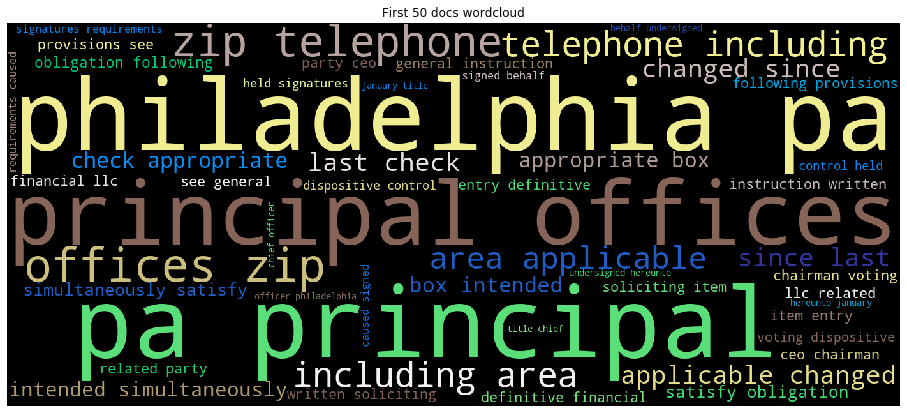

In [45]:
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

st_words = set(stop_words)
#enhancing stopword by removing frequent words
st_words.update(frequent_words)
#st_words.update([s.lower() for s in mentions_keys])

wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',mode='RGBA').generate(' '.join(df_new['form_text'][0:50].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('First 50 docs wordcloud')
plt.axis('off')
plt.show()

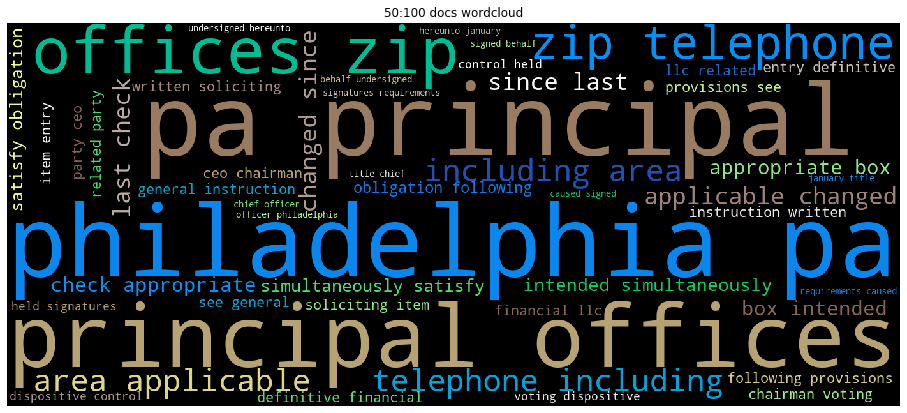

In [47]:
wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',mode='RGBA').generate(' '.join(df_new['form_text'][50:100].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('50:100 docs wordcloud')
plt.axis('off')
plt.show()

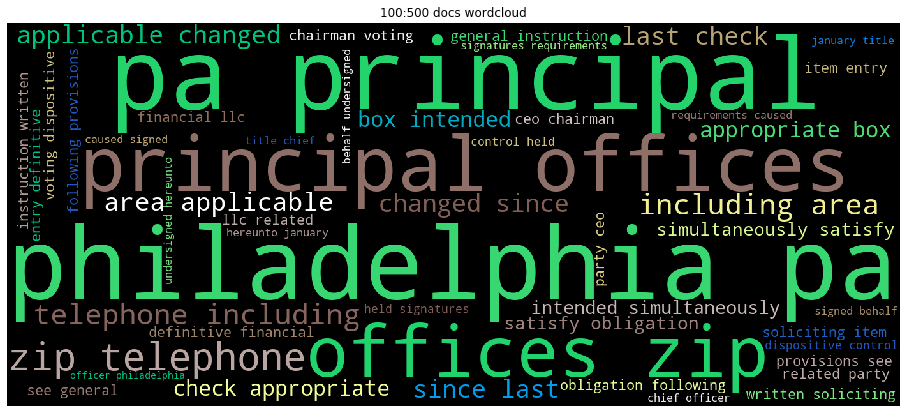

In [49]:
wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',mode='RGBA').generate(' '.join(df_new['form_text'][100:500].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('100:500 docs wordcloud')
plt.axis('off')
plt.show()

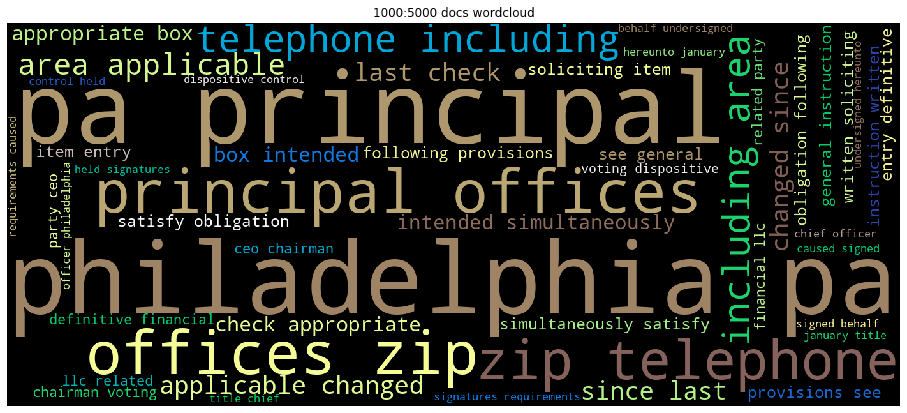

In [51]:
wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',mode='RGBA').generate(' '.join(df_new['form_text'][1000:5000].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('1000:5000 docs wordcloud')
plt.axis('off')
plt.show()